In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("C:\\Users\\Sahil\\Downloads\\drugs_side_effects_drugs_com.csv")

In [9]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [11]:
df.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [13]:
df = df.drop_duplicates()

In [15]:
df.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [17]:
print(df.dtypes)

drug_name                         object
medical_condition                 object
side_effects                      object
generic_name                      object
drug_classes                      object
brand_names                       object
activity                          object
rx_otc                            object
pregnancy_category                object
csa                               object
alcohol                           object
related_drugs                     object
medical_condition_description     object
rating                           float64
no_of_reviews                    float64
drug_link                         object
medical_condition_url             object
dtype: object


In [19]:
df['rating'] = df['rating'].fillna(df['rating'].median())

In [21]:
df['no_of_reviews'] = df['no_of_reviews'].fillna(df['no_of_reviews'].median())

In [23]:
df.isnull

<bound method DataFrame.isnull of            drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of 

In [25]:
categorical_cols = ['drug_name','medical_condition', 'side_effects','generic_name','drug_classes','brand_names','activity','rx_otc','pregnancy_category','csa','alcohol','related_drugs','medical_condition_description','drug_link','medical_condition_url']

for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [27]:
df.isnull()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2927,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2929,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


C:\Users\Sahil\AppData\Local\Temp\ipykernel_10984\3261860831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='viridis')


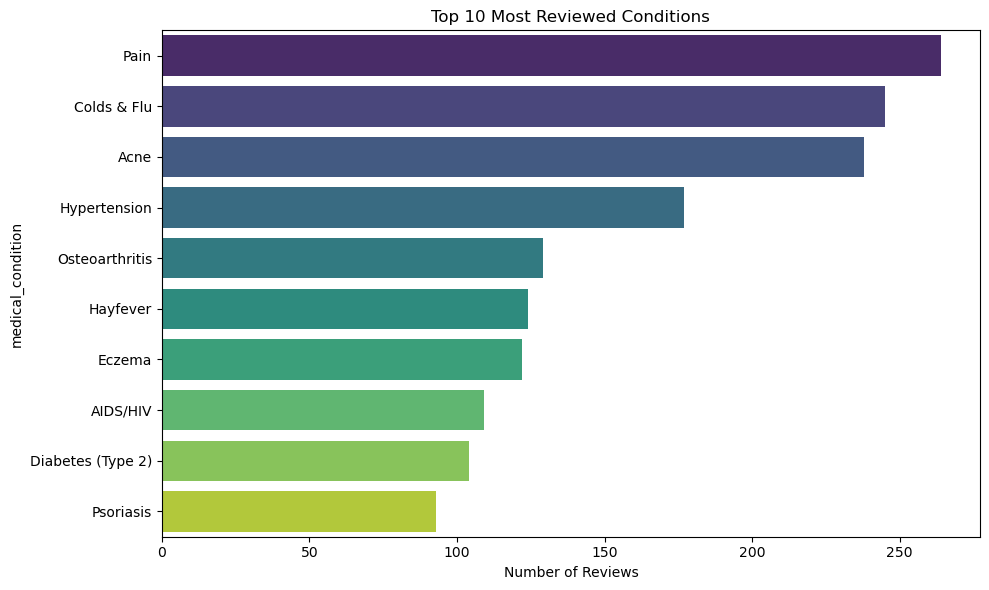

In [29]:
top_conditions = df['medical_condition'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='viridis')
plt.title('Top 10 Most Reviewed Conditions')
plt.xlabel('Number of Reviews')
plt.ylabel('medical_condition')
plt.tight_layout()
plt.show()


C:\Users\Sahil\AppData\Local\Temp\ipykernel_10984\1297074476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='plasma')


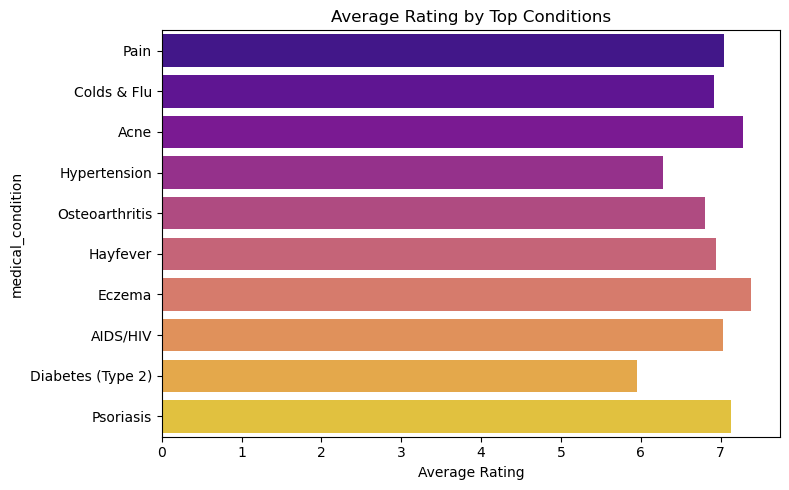

In [31]:
avg_rating = df.groupby('medical_condition')['rating'].mean().loc[top_conditions.index]

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='plasma')
plt.title('Average Rating by Top Conditions')
plt.xlabel('Average Rating')
plt.ylabel('medical_condition')
plt.tight_layout()
plt.show()


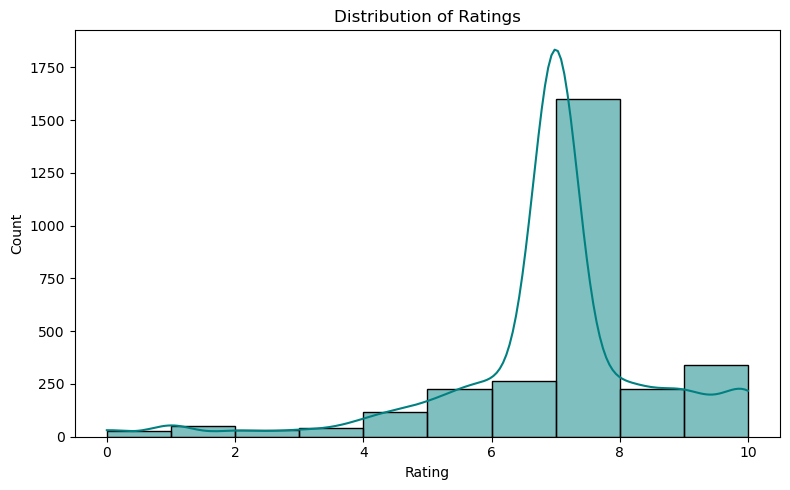

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=10, kde=True, color='teal')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


C:\Users\Sahil\AppData\Local\Temp\ipykernel_10984\604918406.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drug_name.values, y=top_drug_name.index, palette='viridis')


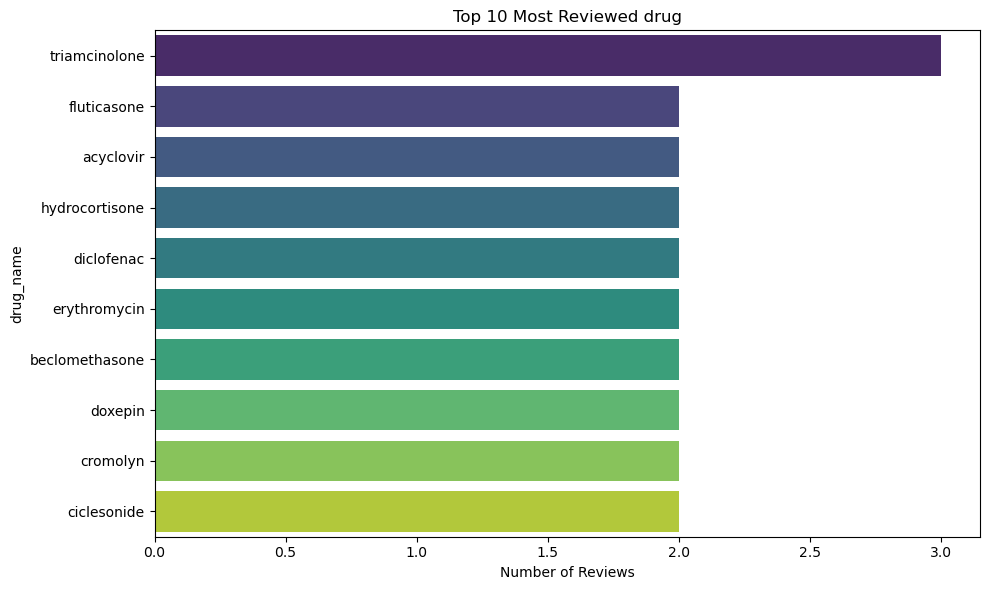

In [35]:
top_drug_name= df['drug_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_drug_name.values, y=top_drug_name.index, palette='viridis')
plt.title('Top 10 Most Reviewed drug')
plt.xlabel('Number of Reviews')
plt.ylabel('drug_name')
plt.tight_layout()
plt.show()


In [37]:
print(df['medical_condition'].head(1000))

0             Acne
1             Acne
2             Acne
3             Acne
4             Acne
          ...     
995    Colds & Flu
996    Colds & Flu
997    Colds & Flu
998    Colds & Flu
999    Colds & Flu
Name: medical_condition, Length: 1000, dtype: object


In [39]:
import pandas as pd

# Filter and sort the top 10 drugs for Acne by rating
top_acne_drugs = df[df['medical_condition'].str.lower() == 'pain']
top_acne_drugs = top_acne_drugs.sort_values(by='rating', ascending=False).head(10)

# Select relevant columns for display
top_acne_table = top_acne_drugs[['drug_name', 'rating', 'no_of_reviews']]

# Display as a table
top_acne_table.reset_index(drop=True, inplace=True)
top_acne_table.style.set_caption("Top 10 Drugs for pain").format({'rating': '{:.1f}', 'no_of_reviews': '{:.0f}'})


,drug_name,rating,no_of_reviews
0,Anacin,10.0,4
1,Buprenex,10.0,4
2,Bactine,10.0,1
3,Oxyfast,10.0,1
4,Vitapap,10.0,2
5,capsaicin / lidocaine / menthol / methyl salicylate,10.0,2
6,Tiger Balm Pain Relieving Patch,10.0,1
7,Medi-Quik Spray,10.0,1
8,AneCream,10.0,1
9,LidoPro,10.0,2


In [41]:
# Filter and sort the top 10 drugs for Acne by rating
top_acne_drugs = df[df['medical_condition'].str.lower() == 'acne']
top_acne_drugs = top_acne_drugs.sort_values(by='rating', ascending=False).head(10)

# Select relevant columns for display
top_acne_table = top_acne_drugs[['drug_name', 'rating', 'no_of_reviews']]

# Display as a table
top_acne_table.reset_index(drop=True, inplace=True)
top_acne_table.style.set_caption("Top 10 Drugs for acne").format({'rating': '{:.1f}', 'no_of_reviews': '{:.0f}'})

,drug_name,rating,no_of_reviews
0,CeraVe SA Renewing,10.0,1
1,Clindagel,10.0,2
2,Avar,10.0,1
3,Septra,10.0,2
4,Vanoxide-HC,10.0,1
5,BenzEFoam Ultra,10.0,1
6,Sulfacleanse 8/4,10.0,1
7,benzoyl peroxide / hydrocortisone,10.0,1
8,benzoyl peroxide / sulfur,10.0,2
9,trifarotene,10.0,1


In [43]:
# Filter and sort the top 10 drugs for Acne by rating
top_acne_drugs = df[df['medical_condition'].str.lower() == 'hypertension']
top_acne_drugs = top_acne_drugs.sort_values(by='rating', ascending=False).head(10)

# Select relevant columns for display
top_acne_table = top_acne_drugs[['drug_name', 'rating', 'no_of_reviews']]

# Display as a table
top_acne_table.reset_index(drop=True, inplace=True)
top_acne_table.style.set_caption("Top 10 Drugs for hypertension").format({'rating': '{:.1f}', 'no_of_reviews': '{:.0f}'})

,drug_name,rating,no_of_reviews
0,hydrochlorothiazide / spironolactone,10.0,1
1,bendroflumethiazide / nadolol,10.0,1
2,Inspra,10.0,1
3,Corzide 80/5,10.0,1
4,betaxolol,10.0,1
5,Aldactazide,10.0,1
6,acebutolol,9.7,3
7,amlodipine / hydrochlorothiazide / valsartan,9.7,7
8,Avalide,9.6,5
9,Exforge HCT,9.6,5


In [45]:
# Filter and sort the top 10 drugs for Acne by rating
top_acne_drugs = df[df['medical_condition'].str.lower() == 'osteoarthritis']
top_acne_drugs = top_acne_drugs.sort_values(by='rating', ascending=False).head(10)

# Select relevant columns for display
top_acne_table = top_acne_drugs[['drug_name', 'rating', 'no_of_reviews']]

# Display as a table
top_acne_table.reset_index(drop=True, inplace=True)
top_acne_table.style.set_caption("Top 10 Drugs for osteoarthritis").format({'rating': '{:.1f}', 'no_of_reviews': '{:.0f}'})

,drug_name,rating,no_of_reviews
0,tolmetin,10.0,1
1,Dolobid,10.0,1
2,Motrin,10.0,1
3,diflunisal,9.7,3
4,Cataflam,9.5,2
5,Indocin,9.5,2
6,Zorvolex,9.4,7
7,Naprelan,9.4,5
8,Feldene,9.0,4
9,trolamine salicylate,9.0,7


In [47]:
# Filter and sort the top 10 drugs for Acne by rating
top_acne_drugs = df[df['medical_condition'].str.lower() == 'hayfever']
top_acne_drugs = top_acne_drugs.sort_values(by='rating', ascending=False).head(10)

# Select relevant columns for display
top_acne_table = top_acne_drugs[['drug_name', 'rating', 'no_of_reviews']]

# Display as a table
top_acne_table.reset_index(drop=True, inplace=True)
top_acne_table.style.set_caption("Top 10 Drugs for Hay Fever").format({'rating': '{:.1f}', 'no_of_reviews': '{:.0f}'})

,drug_name,rating,no_of_reviews
0,Zyrtec-D 12 Hour,10.0,1
1,Aller-Tec,10.0,1
2,acrivastine / pseudoephedrine,10.0,10
3,brompheniramine / pseudoephedrine,10.0,3
4,cyproheptadine,10.0,1
5,clemastine,10.0,1
6,Deconamine,10.0,3
7,Allegra ODT,10.0,1
8,Semprex-D,10.0,10
9,Zyrtec-D,9.7,3


In [49]:
# Filter and sort the top 10 drugs for Acne by rating
top_acne_drugs = df[df['medical_condition'].str.lower() == 'eczema']
top_acne_drugs = top_acne_drugs.sort_values(by='rating', ascending=False).head(10)

# Select relevant columns for display
top_acne_table = top_acne_drugs[['drug_name', 'rating', 'no_of_reviews']]

# Display as a table
top_acne_table.reset_index(drop=True, inplace=True)
top_acne_table.style.set_caption("Top 10 Drugs for eczema").format({'rating': '{:.1f}', 'no_of_reviews': '{:.0f}'})

,drug_name,rating,no_of_reviews
0,flurandrenolide,10.0,3
1,Clobex,10.0,2
2,clocortolone,10.0,3
3,Cordran Tape,10.0,3
4,Cloderm,10.0,2
5,DesOwen,9.8,5
6,prednicarbate,9.5,2
7,Dermatop,9.5,2
8,diflorasone,9.5,2
9,Ultravate,9.5,4


In [51]:
# Filter and sort the top 10 drugs for Acne by rating
top_acne_drugs = df[df['medical_condition'].str.lower() == 'aids/hiv']
top_acne_drugs = top_acne_drugs.sort_values(by='rating', ascending=False).head(10)

# Select relevant columns for display
top_acne_table = top_acne_drugs[['drug_name', 'rating', 'no_of_reviews']]

# Display as a table
top_acne_table.reset_index(drop=True, inplace=True)
top_acne_table.style.set_caption("Top 10 Drugs for AIDS/HIV").format({'rating': '{:.1f}', 'no_of_reviews': '{:.0f}'})

,drug_name,rating,no_of_reviews
0,Reyataz,10.0,2
1,Epzicom,10.0,5
2,atazanavir,10.0,2
3,Tivicay PD,10.0,1
4,Delstrigo,9.5,2
5,doravirine / lamivudine / tenofovir,9.5,2
6,Stribild,9.5,89
7,cobicistat / elvitegravir / emtricitabine / tenofovir,9.5,89
8,abacavir / lamivudine,9.4,6
9,Fuzeon,9.3,5


In [53]:
# Convert 'activity' column to numeric (remove % and convert to float)
df['activity_numeric'] = df['activity'].str.replace('%', '', regex=False).astype(float)

# Drop rows with missing brand names
df_clean = df.dropna(subset=['brand_names'])

# Get the top 10 brands by activity
top_10_brands = df_clean[['brand_names', 'drug_name', 'activity_numeric']]
top_10_brands = top_10_brands.sort_values(by='activity_numeric', ascending=False).head(10)

# Reset index and display the table
top_10_brands.reset_index(drop=True, inplace=True)
top_10_brands

,brand_names,drug_name,activity_numeric
0,"Aloprim, Zyloprim",allopurinol,100.0
1,"Diamode, Imotil",loperamide,100.0
2,"Euthyrox, Levoxyl, Synthroid, Thyquidity, Tiro...",levothyroxine,100.0
3,"Fortamet, Glucophage, Glucophage XR",metformin,100.0
4,"Acne-Clear, Benzac AC, BenzePrO, Benziq, Brevo...",Vyvanse,100.0
5,Stromectol,ivermectin,100.0
6,"Acne-Clear, Benzac AC, BenzePrO, Benziq, Brevo...",Tamiflu,100.0
7,"Colace, Diocto, Doc-Q-Lace, Docusil, Docusoft ...",docusate,100.0
8,Paraplatin,carboplatin,100.0
9,Lipitor,atorvastatin,100.0


In [61]:
drugs_no_alcohol = df[df['alcohol'] == 'X']

# Select relevant columns for clarity
drugs_no_alcohol = drugs_no_alcohol[['drug_name', 'brand_names', 'alcohol', 'activity', 'medical_condition']]

# Reset index
drugs_no_alcohol.reset_index(drop=True, inplace=True)

# Display the filtered dataset
drugs_no_alcohol

,drug_name,brand_names,alcohol,activity,medical_condition
0,doxycycline,"Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",X,87%,Acne
1,spironolactone,"Aldactone, CaroSpir",X,82%,Acne
2,minocycline,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",X,48%,Acne
3,Accutane,"Acne-Clear, Benzac AC, BenzePrO, Benziq, Brevo...",X,41%,Acne
4,clindamycin,"Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",X,39%,Acne
...,...,...,...,...,...
2926,benzphetamine,"Didrex, Regimex",X,2%,Weight Loss
2927,fenfluramine,Fintepla,X,1%,Weight Loss
2928,Fendique ER,"Acne-Clear, Benzac AC, BenzePrO, Benziq, Brevo...",X,0%,Weight Loss
2929,Imcivree,"Acne-Clear, Benzac AC, BenzePrO, Benziq, Brevo...",X,0%,Weight Loss


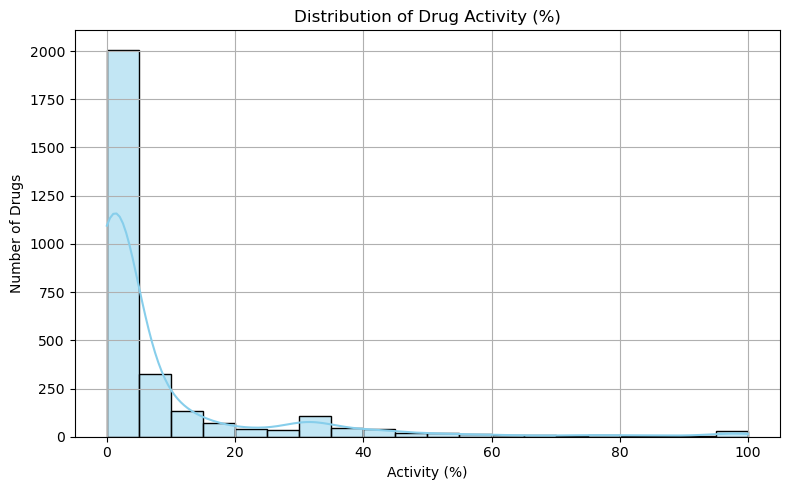

In [63]:
df['activity_numeric'] = df['activity'].str.replace('%', '', regex=False).astype(float)

# ========== 1. Histogram of Drug Activity ==========
plt.figure(figsize=(8, 5))
sns.histplot(df['activity_numeric'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Drug Activity (%)')
plt.xlabel('Activity (%)')
plt.ylabel('Number of Drugs')
plt.grid(True)
plt.tight_layout()
plt.show()

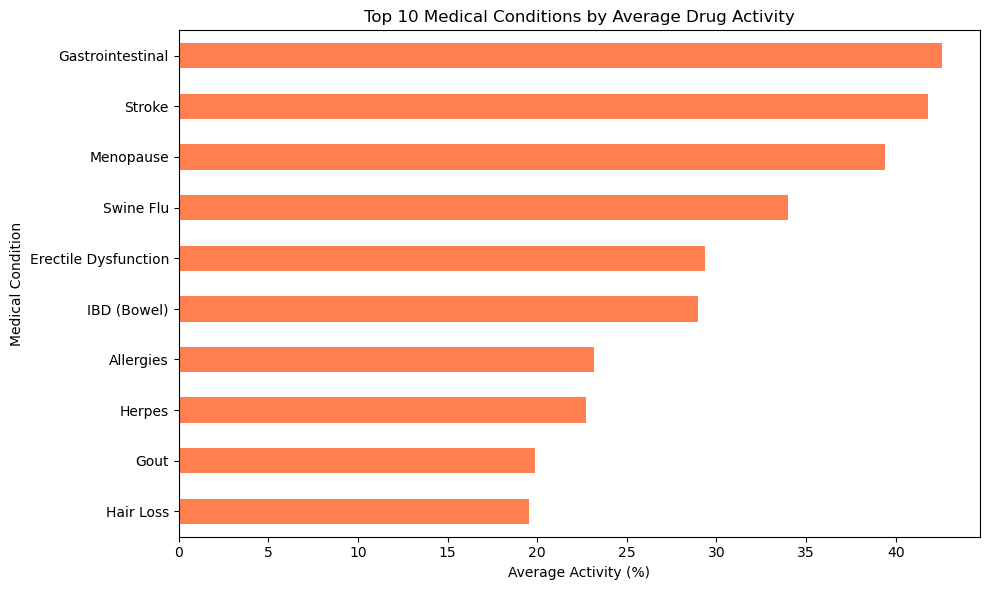

In [65]:
top_conditions = (
    df.groupby('medical_condition')['activity_numeric']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
top_conditions.plot(kind='barh', color='coral')
plt.title('Top 10 Medical Conditions by Average Drug Activity')
plt.xlabel('Average Activity (%)')
plt.ylabel('Medical Condition')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


C:\Users\Sahil\AppData\Local\Temp\ipykernel_10984\2315780434.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_reviews = line_df.groupby('review_group')['rating'].mean()


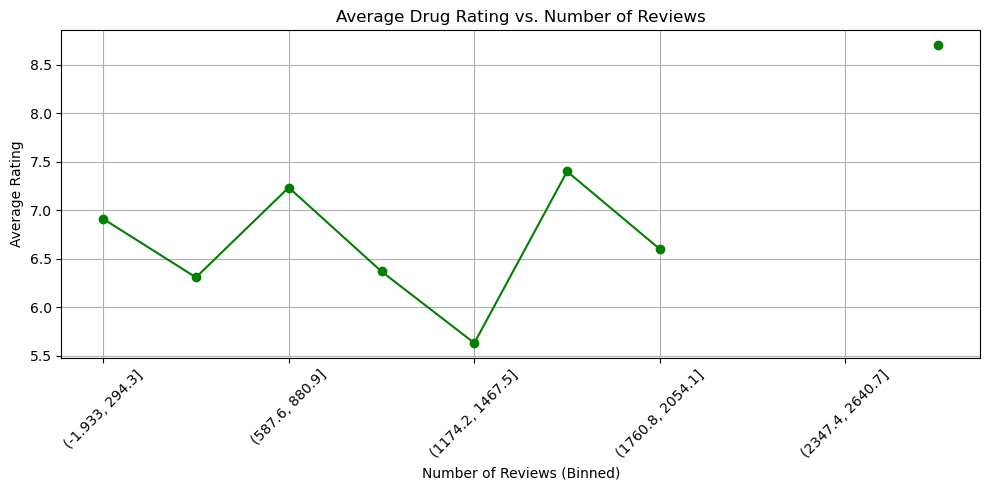

In [67]:
line_df = df[['no_of_reviews', 'rating']].dropna()

# Group similar review counts (bucketed)
line_df['review_group'] = pd.cut(line_df['no_of_reviews'], bins=10)
avg_rating_by_reviews = line_df.groupby('review_group')['rating'].mean()

# Plot
plt.figure(figsize=(10, 5))
avg_rating_by_reviews.plot(marker='o', linestyle='-', color='green')
plt.title('Average Drug Rating vs. Number of Reviews')
plt.xlabel('Number of Reviews (Binned)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()